<a href="https://colab.research.google.com/github/ashwinarun00/realtimefakenewsdetection/blob/main/Fake_News_Extraction_BERT_Paramters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Real-Time News Classification

##I.Extracting News From TV/Radio via Speech to Text

In [ ]:
import msvcrt
import time
import pyaudio
import speech_recognition as sr

# obtain audio from the microphone
r = sr.Recognizer()
print("Enter 'm' to BEGIN recording \nEnter 'q' to STOP recording")
f = open('log.txt','a') #to save the output
while True:
    ch = input("Enter status:")
    if ch.upper() == 'M':
        with sr.Microphone() as source:
            print("Recording...")
            audio = r.listen(source)
            try:
                text = r.recognize_google(audio)
                print("Text : {}".format(text))
                f.write(text)
            except sr.UnknownValueError:
                print("Google Speech Recognition could not understand audio")
            except sr.RequestError as e:
                print("Could not request results from Google Speech Recognition service; {0}".format(e))
    if ch.upper() == 'Q':
        f.close()
        break
    else:
        continue

In [ ]:
audio = '/content/audio1.mp3'
import IPython.display
IPython.display.Audio(audio)

In [ ]:
with open('/content/log.txt') as f:
  fake_text = f.read()
print(fake_text)

In [ ]:
audio = '/content/audio2.mp3'
import IPython.display
IPython.display.Audio(audio)

In [ ]:
with open('/content/log.txt') as f:
  true_text = f.read()
print(true_text)

##II.Extracting News From Image Capturing Headline

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
import pytesseract
import cv2
import shutil
import os
import random
import re, string
from string import punctuation
import matplotlib.pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow


f = open('log2.txt','w') #to save the output

stop = {"breaking", "news", "report", "channel"}
punctuation = set(string.punctuation)
stop.update(punctuation)

def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

image = cv2.imread("/content/headline2.jpg")
cv2_imshow(image)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'


# get the string
string = pytesseract.image_to_string(image)
string = remove_stopwords(string)
string = string.lower()
print(string)
f.write(string)
f.close()

##1. Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np # linear algebra

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

##2. Importing dataset

In [ ]:
link = 'https://drive.google.com/file/d/1_EHtBBeecWj2bMHEIcklvDqwxzsL8YrM/view'

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Fake.csv')

fake_data = pd.read_csv('Fake.csv')

In [ ]:
link = 'https://drive.google.com/file/d/1b2ki8XaRMXRqnrOFWvXze3gz8kPBXndk/view'

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('True.csv')

real_data = pd.read_csv('True.csv')

##3. Data preprocessing & cleaning

In [ ]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
print(len(real_data))
print(len(fake_data))

nb_articles = min(len(real_data), len(fake_data))
real_data = real_data[:nb_articles]
fake_data = fake_data[:nb_articles]

print(len(real_data))
print(len(fake_data))

21417
23481
21417
21417


###Adding labels for classification

In [ ]:
real_data['is_fake'] = False
fake_data['is_fake'] = True

In [ ]:
real_data.head()

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",False
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",False
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",False
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",False
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",False


In [ ]:
fake_data.head()

,title,text,subject,date,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",True
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",True
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",True
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",True
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",True


###Merging the two datasets & reshuffling the order

In [ ]:
from sklearn.utils import shuffle

data = pd.concat([real_data, fake_data])

# Shuffle the data
data = shuffle(data).reset_index(drop=True)
data.head()

,title,text,subject,date,is_fake
0,Venezuela opposition blames Maduro for detaine...,CARACAS (Reuters) - Venezuela s opposition bla...,worldnews,"September 18, 2017",False
1,Thousands donate to Planned Parenthood in name...,NEW YORK (Thomson Reuters Foundation) - Thousa...,politicsNews,"November 15, 2016",False
2,"London police give all clear, lift cordon in f...",LONDON (Reuters) - London police said they had...,worldnews,"September 20, 2017",False
3,DRUNKS and EMPTY SEATS: Crooked Hillary Pander...,The woman whose criminal investigation has bee...,left-news,"Oct 30, 2016",True
4,"Merkel, party leaders meet to rev up German co...",BERLIN (Reuters) - Key allies of Chancellor An...,worldnews,"October 29, 2017",False


###Merging title and text

In [ ]:
data['text'] = data['title'] + ' ' + data['text']
data.head()

,title,text,subject,date,is_fake
0,Venezuela opposition blames Maduro for detaine...,Venezuela opposition blames Maduro for detaine...,worldnews,"September 18, 2017",False
1,Thousands donate to Planned Parenthood in name...,Thousands donate to Planned Parenthood in name...,politicsNews,"November 15, 2016",False
2,"London police give all clear, lift cordon in f...","London police give all clear, lift cordon in f...",worldnews,"September 20, 2017",False
3,DRUNKS and EMPTY SEATS: Crooked Hillary Pander...,DRUNKS and EMPTY SEATS: Crooked Hillary Pander...,left-news,"Oct 30, 2016",True
4,"Merkel, party leaders meet to rev up German co...","Merkel, party leaders meet to rev up German co...",worldnews,"October 29, 2017",False


###Converting into lowercase

In [ ]:
#convert to lowercase ,concatenate
#Confusion matrix in the end
# Convert to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()


,title,text,subject,date,is_fake
0,Venezuela opposition blames Maduro for detaine...,venezuela opposition blames maduro for detaine...,worldnews,"September 18, 2017",False
1,Thousands donate to Planned Parenthood in name...,thousands donate to planned parenthood in name...,politicsNews,"November 15, 2016",False
2,"London police give all clear, lift cordon in f...","london police give all clear, lift cordon in f...",worldnews,"September 20, 2017",False
3,DRUNKS and EMPTY SEATS: Crooked Hillary Pander...,drunks and empty seats: crooked hillary pander...,left-news,"Oct 30, 2016",True
4,"Merkel, party leaders meet to rev up German co...","merkel, party leaders meet to rev up german co...",worldnews,"October 29, 2017",False


###Spliting Data into training, testing and validation sets


In [ ]:
train_data, validate_data, test_data = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

train_data = train_data.reset_index(drop=True)
validate_data = validate_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

del real_data
del fake_data

print("Size of training set: {}".format(len(train_data)))
print("Size of validation set: {}".format(len(validate_data)))
print("Size of testing set: {}".format(len(test_data)))

Size of training set: 25700
Size of validation set: 8567
Size of testing set: 8567


##Model Building

Installing the required libraries:

In [ ]:
!conda install -y pytorch torchvision cudatoolkit=10.1 -c pytorch
!pip install transformers

/bin/bash: conda: command not found


BERT

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")
model.config.num_labels = 1

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Creating the model structure

In [ ]:
# Freeze the pre trained parameters
for param in model.parameters():
    param.requires_grad = False

# Add three new layers at the end of the network
model.classifier = nn.Sequential(
    nn.Linear(768, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 2),
    nn.Softmax(dim=1)
)

model = model.to(device)

In [ ]:
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.classifier.parameters(), lr=0.01)

In [ ]:
def preprocess_text(text):
    parts = []

    text_len = len(text.split(' '))
    delta = 300
    max_parts = 5
    nb_cuts = int(text_len / delta)
    nb_cuts = min(nb_cuts, max_parts)


    for i in range(nb_cuts + 1):
        text_part = ' '.join(text.split(' ')[i * delta: (i + 1) * delta])
        parts.append(tokenizer.encode(text_part, return_tensors="pt", max_length=500).to(device))

    return parts

Model training

In [ ]:
print_every = 300

total_loss = 0
all_losses = []

CUDA_LAUNCH_BLOCKING=1

model.train()

for idx, row in train_data.iterrows():
    text_parts = preprocess_text(str(row['text']))
    label = torch.tensor([row['is_fake']]).long().to(device)

    optimizer.zero_grad()

    overall_output = torch.zeros((1, 2)).float().to(device)
    for part in text_parts:
        if len(part) > 0:
            try:
                input = part.reshape(-1)[:512].reshape(1, -1)
                # print(input.shape)
                overall_output += model(input, labels=label)[1].float().to(device)
            except Exception as e:
                print(str(e))

#     overall_output /= len(text_parts)
    overall_output = F.softmax(overall_output[0], dim=-1)

    if label == 0:
        label = torch.tensor([1.0, 0.0]).float().to(device)
    elif label == 1:
        label = torch.tensor([0.0, 1.0]).float().to(device)

    # print(overall_output, label)

    loss = criterion(overall_output, label)
    total_loss += loss.item()

    loss.backward()
    optimizer.step()

    if idx % print_every == 0 and idx > 0:
        average_loss = total_loss / print_every
        print("{}/{}. Average loss: {}".format(idx, len(train_data), average_loss))
        all_losses.append(average_loss)
        total_loss = 0



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


300/25700. Average loss: 0.24235921976466973
600/25700. Average loss: 0.22277765635401012
900/25700. Average loss: 0.19835242715043327
1200/25700. Average loss: 0.17475814981929336
1500/25700. Average loss: 0.1475411510366636
1800/25700. Average loss: 0.12307272840891528
2100/25700. Average loss: 0.12878853305863838
2400/25700. Average loss: 0.11472246393716584
2700/25700. Average loss: 0.10255875075254153
3000/25700. Average loss: 0.11043836443925102
3300/25700. Average loss: 0.09486659812730068
3600/25700. Average loss: 0.09377309023732475
3900/25700. Average loss: 0.09410214598129339
4200/25700. Average loss: 0.10732514638604092
4500/25700. Average loss: 0.12569653447821716
4800/25700. Average loss: 0.08334813698272531
5100/25700. Average loss: 0.07893356760791903
5400/25700. Average loss: 0.09042730144606442
5700/25700. Average loss: 0.10119068292503168
6000/25700. Average loss: 0.08015675864929411
6300/25700. Average loss: 0.07695165122240724
6600/25700. Average loss: 0.0825410321

Plotting loss:

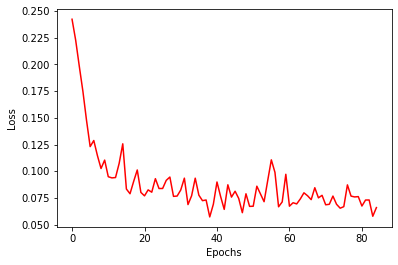

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
torch.save(model.state_dict(), "model_after_train.pt")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(all_losses,color='red')

## Accuracy on test set

In [ ]:
total = len(test_data)
labell=[]
resultl=[]
number_right = 0
model.eval()
with torch.no_grad():
    for idx, row in test_data.iterrows():
        text_parts = preprocess_text(str(row['text']))
        label = torch.tensor([row['is_fake']]).float().to(device)

        overall_output = torch.zeros((1,2)).to(device)
        try:
            for part in text_parts:
                if len(part) > 0:
                    overall_output += model(part.reshape(1, -1))[0]
        except RuntimeError:
            print("GPU out of memory, skipping this entry.")
            continue

        overall_output = F.softmax(overall_output[0], dim=-1)

        result = overall_output.max(0)[1].float().item()
        resultl.append(result)
        labell.append(label.item())

        if result == label.item():
            number_right += 1


        if idx % print_every == 0 and idx > 0:
            print("{}/{}. Current accuracy: {}".format(idx, total, number_right / idx))

print("Accuracy on test data: {}".format(number_right / total))



300/8567. Current accuracy: 0.9733333333333334
600/8567. Current accuracy: 0.9716666666666667
900/8567. Current accuracy: 0.9633333333333334
1200/8567. Current accuracy: 0.955
1500/8567. Current accuracy: 0.958
1800/8567. Current accuracy: 0.9627777777777777
2100/8567. Current accuracy: 0.9642857142857143
2400/8567. Current accuracy: 0.965
2700/8567. Current accuracy: 0.9651851851851851
3000/8567. Current accuracy: 0.964
3300/8567. Current accuracy: 0.9645454545454546
3600/8567. Current accuracy: 0.9644444444444444
3900/8567. Current accuracy: 0.9648717948717949
4200/8567. Current accuracy: 0.9652380952380952
4500/8567. Current accuracy: 0.9653333333333334
4800/8567. Current accuracy: 0.9660416666666667
5100/8567. Current accuracy: 0.9654901960784313
5400/8567. Current accuracy: 0.9651851851851851
5700/8567. Current accuracy: 0.9652631578947368
6000/8567. Current accuracy: 0.966
6300/8567. Current accuracy: 0.966031746031746
6600/8567. Current accuracy: 0.9659090909090909
6900/8567. Cu

# Confusion Matrix

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=labell, y_pred=resultl)

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['Real','Fake']

Confusion matrix, without normalization
[[4030  228]
 [  67 4242]]


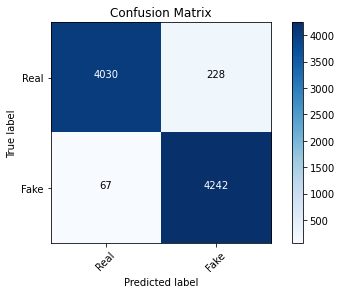

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import f1_score
f1_score(labell,resultl,average='macro')

0.9655444426334564

RF Model: ROC AUC=0.965


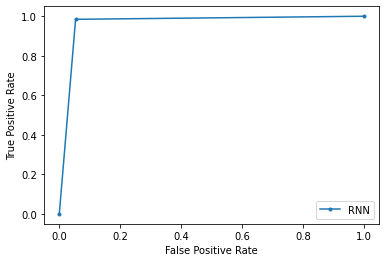

In [ ]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
y_test = labell
y_score = resultl
#pred = model.predict(padded_test)
# Probability of True class
y_score = y_score

# calculate scores
auc = roc_auc_score(y_test, y_score)
# summarize scores
print('RF Model: ROC AUC=%.3f' % (auc))
# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, y_score)
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='BERT model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Testing Custom Inputs

In [ ]:
def test(text):
    text_parts = preprocess_text(text)
    overall_output = torch.zeros((1,2)).to(device)
    try:
        for part in text_parts:
            if len(part) > 0:
                overall_output += model(part.reshape(1, -1))[0]
    except RuntimeError:
        print("GPU out of memory, skipping this entry.")

    overall_output = F.softmax(overall_output[0], dim=-1)

    value, result = overall_output.max(0)

    term = "fake"
    if result.item() == 0:
        term = "real"

    print("{} at {}%".format(term, value.item() * 100))

In [ ]:
fake1 = """
Americans to fund killing babies in abortion that she has been caught trying to add taxpayer financing of abortions to the bill to combat the Coronavirus and provide economic stimulus to the nation as it deals with the COVD-19 outbreak.
Nancy Pelosi has a long history of promoting abortion and her first act after becoming Speaker in 2019 was pushing legislation to use tax money for abortions. So it’s no surprise she is trying to exploit the Coronavirus pandemic to push abortion funding again.
As The Daily Caller reports: House Speaker Nancy Pelosi sought to include a potential way to guarantee federal funding for abortion into the coronavirus economic stimulus plan, according to multiple senior White House officials.
Speaking to the Daily Caller, those officials alleged that while negotiating the stimulus with U.S. Treasury Secretary Steve Mnuchin, Pelosi tried to lobby for “several” provisions that stalled bipartisan commitment to the effort. One was a mandate for up to $1 billion to reimburse laboratory claims, which White House officials say would set a precedent of health spending without protections outlined in the Hyde Amendment.
LifeNews depends on the support of readers like you to combat the pro-abortion media. Please donate now.
“A New mandatory funding stream that does not have Hyde protections would be unprecedented,” one White House official explained. “Under the guise of protecting people, Speaker Pelosi is working to make sure taxpayer dollars are spent covering abortion—which is not only backwards, but goes against historical norms.”
A second White House official referred to the provision as a “slush fund” and yet another questioned “what the Hyde Amendment and abortion have to do with protecting Americans from coronavirus?”
Americans should insist to their members of Congress that we need a clean bill that provides aggressive action to help patients and spur the economy. Killing babies with our tax dollars is not the answer to the coronavirus and the situation should not be exploited for political gain.
"""

true1 = """
Price spikes, however, would cause demand to wither and some expensive avocados might be leftover, and stores might try to ration avocados, he added.
"Exactly what the retail strategy would be in this case, I’m not sure. But we would have vastly fewer avocados," Sumner said.
Just how fast avocados would disappear, if at all, would depend on whether the Trump administration enacts a full or partial border closure. White House economic adviser Larry Kudlow told CNBC he’s looking for ways to keep some commerce flowing.
"We are looking at different options, particularly if you can keep those freight lanes, the truck lanes, open," he said this week.
Ben Holtz owns Rocky H Ranch, a 70-acre family-run avocado farm in northern San Diego County. He agreed avocados would run out within weeks.
"Mexico is the big player today. California is not. You shut down the border and California can’t produce to meet the demand," Holtz said. "There will be people without their guacamole."
While Mexico’s avocado harvest is year-round, California’s is limited to April through July. Growers in the state have picked only about 3 percent of what’s expected to be a much smaller crop of about 175 million pounds this year, Holtz said. A heat wave last summer reduced the crop size.
California’s avocado harvest has averaged approximately 300 million pounds in recent years, according to data from the California Avocado Commission. By contrast, the U.S. has imported more than 1.5 billion pounds of avocados from Mexico annually. Representatives from the commission did not respond to requests for this article.
Altogether, the U.S. received 43 percent of its fruit and vegetable imports from Mexico in 2016, according to the U.S. Department of Agriculture.
Also affecting this year’s avocado supply, a California avocado company in March recalled shipments to six states last month after fears the fruit might be contaminated with a bacterium that can cause health risks.
Until the early 2000s, California was the nation’s leading supplier of avocados, Holtz said. Mexico gradually overtook the state and now dominates sales in the U.S.
"It’s a very big possibility," Holtz said of avocado shortages. "Three weeks would dry up the Mexican inventory. California alone consumes more avocados than are grown in our state. Cold storage supply chain is basically three weeks or less of inventory. Most of the time it’s seven days."
A spokeswoman for the California Restaurant Association said "we haven’t heard concerns from restaurants, it doesn’t mean they aren’t worried." A national grocers association said it will "continue to closely monitor any developments" at the border, but did not have information about the potential impact on avocados.
"""

test(fake1)
test(true1)



fake at 75.30455589294434%
real at 87.16217279434204%


Recorded true news from CNN:

In [ ]:
true2= """"Former president once again invoked the Big Lodge Beach Beach in Arizona over the weekend
      ,where to the surprise of really nobody, he came out forcefully behind that sham audit of millions
      of votes cast in and around Phoenix during the last election. But science was also under attack during the event,
      even though he did manage to make a someone guarded endorsement of the COVID vaccine, which is certainly helpful to some degree.
       """
test(true2)

fake at 63.91133666038513%


From True.csv :

In [ ]:
true4="""A lottery drawing to settle a tied Virginia legislative race that could shift the statehouse balance of power has been indefinitely postponed, state election officials said on Tuesday, after the Democratic candidate mounted a legal fight.
    The decision to put off the high-stakes lotto, originally scheduled for Wednesday, marks the latest twist in a dramatic election recount that at one point showed Democrat Shelly Simonds beating Republican incumbent David Yancey by a single vote.
    A victory by Simonds would shift Republicansâ€™ slim control of the 100-member House of Delegates to an even 50-50 split with the Democrats, forcing the two parties into a rare power-sharing arrangement.
    A day after Simonds emerged as the victor of a recount, a three-judge panel ruled that a disputed ballot should be counted for Yancey.
    That decision left the two candidates tied with 11,608 votes each in a district that encompasses the shipping hub of Newport News in southeastern Virginia, setting the stage for the equivalent of a coin toss to pick a final winner.
    Simonds asked a state court to reconsider on Tuesday, arguing that the disputed ballot was wrongly included.
    An image filed in court showed that the ballot had bubbles filled in beside both names, with a slash mark by Simondsâ€™ name.
    The voter selected Republicans for other offices. Simonds told reporters that the case had implications not only for her contest but for the integrity of state elections as a whole,
    saying that without a court ruling in her favor, â€œrecounts would become a never-ending spiral of courtroom challenges.â€ The chairman of the Virginia Board of Elections, James Alcorn,
    said in a statement that while holding a lottery would be in keeping with state law, such a move should be considered â€œan action of last resort.â€
    He added: â€œAny substantive concerns regarding the election or recount should be resolved before a random drawing is conducted.â€
    Yanceyâ€™s campaign did not immediately respond to requests for comment. The Virginia House Republican Caucus said in a statement that it was reviewing the new court filings.
    â€œWe believe the court acted appropriately and that the integrity of the process is without question,â€ spokesman Parker Slaybaugh said. Virginia Department of Elections spokeswoman Andrea Gaines said in an email that no new date for a drawing has been set.
    Democrats notched historic gains in Virginiaâ€™s statehouse elections last month, part of the partyâ€™s first big wave of political victories since Republican Donald Trump won the White House last year.
    Before the Nov. 7 general election, Virginia Republicans held 66 seats to the Democratsâ€™ 34 in the House of Delegates, along with a majority in the state Senate.
            """
test(true4)

real at 86.93874478340149%


True4: BBC https://youtu.be/N1MmTEtwsl0

In [ ]:
True4= "headlines today as Joe Biden tightens his grip on the White House. Donald Trump makes more unsubstantiated claims of voting for. If you count the legal votes, I easily win if you count the illegal votes, they can try to steal. Election. Joe Biden appeals for calm and says democracy sometimes requires a little patience. We have no doubt that when the county should be centered Harrison, I will be declared the winners. So I ask everyone to stay calm. All people to stay calm."
test(true4)

real at 86.93874478340149%


https://youtu.be/wzQj6D0fyIg Fake news clips presented in the show


In [ ]:
false4 = " say goodbye to your burgers. If you want to sign up for the Biden climate agenda, researchers say you'd have to cut about 90% of red meat from your diet. For Americans, that means a limit of £4.00 of red meat per year. Americans would have to cut red meat consumption by a whopping 90%. That means only one burger a month. Part of his climate or green targets are to cut our red meat he wants to. Cut out 90% of the red need that you all eat that's £4.00 a year. Listen £44 a year. That's my weekly consumption of red meat at the minimum. No burgers on July 4th. No steaks on the Barbie. I'm sure Middle America is just kind of love that can you grill those Brussels sprouts so get ready. You can throw back a plant based beer with your grilled Brussels sprouts and wave your American flag. That's right, and binds them here. "

test(false4)

fake at 73.07451963424683%
